In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from deap import tools, algorithms

from preprocessing import preprocess_data
from ga_setup import setup_toolbox, setup_stats
from strategy_visualizer import print_strategy, plot_strategy, simulate_strategy, simulate_best_possible_strategy

In [2]:
df = pd.read_csv("./data/wig_d.csv", sep=";")
stock_data, ta_features = preprocess_data(df)
pd.concat([stock_data, ta_features],axis=1)

,date,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
100,2011-09-08,40442.90,40732.76,40001.76,40405.17,117787166,0.010527,0.031441,0.851364,0.624558,...,0.577687,0.507310,0.674967,0.379144,0.512771,0.260686,0.096299,0.684075,0.704275,0.124458
101,2011-09-09,40190.27,40253.71,38708.57,38708.57,88364971,0.002279,0.019927,0.751935,0.530293,...,0.565250,0.515271,0.629350,0.351974,0.496543,0.232126,0.095295,0.458212,0.482086,0.069694
102,2011-09-12,37969.75,37969.75,37051.55,37437.36,152938899,0.000000,0.000000,0.679218,0.419615,...,0.537982,0.515282,0.564764,0.403653,0.497833,0.326124,0.087761,0.507809,0.531693,0.028660
103,2011-09-13,37963.50,38081.49,37120.14,37735.42,120273982,0.003144,0.015671,0.632797,0.479370,...,0.523094,0.511819,0.536547,0.408170,0.500112,0.331433,0.080410,0.728995,0.747359,0.038281
104,2011-09-14,37438.64,38144.62,37438.64,37881.76,116739076,0.005926,0.030882,0.613277,0.517987,...,0.515916,0.507375,0.528576,0.408150,0.501930,0.328958,0.070523,0.706859,0.726172,0.043005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,2020-06-05,50444.76,51573.79,50444.76,51494.63,102913799,0.983454,0.953462,0.783798,0.886169,...,0.966601,0.937050,0.723119,0.650704,0.754736,0.439126,0.434404,0.825358,0.838599,0.482414
2279,2020-06-08,51488.28,51704.68,50806.53,51451.61,88171198,0.987046,0.941974,0.820142,0.852654,...,0.984643,0.956861,0.725604,0.633581,0.767887,0.389767,0.453539,0.681307,0.701609,0.481026
2280,2020-06-09,51600.46,51797.65,50738.75,51289.49,95756903,0.987406,0.929497,0.779111,0.816049,...,0.993649,0.974810,0.710479,0.628860,0.777104,0.368658,0.460786,0.668755,0.689500,0.475793
2281,2020-06-10,51393.51,51574.08,50896.16,51486.94,128616735,0.996324,0.946255,0.837785,0.812151,...,1.000000,0.990651,0.693349,0.667997,0.795286,0.416764,0.468005,0.706705,0.726024,0.482166


In [3]:
# for col in ta_features.columns:
#     plt.plot(ta_features[col])
#     plt.title(col)
#     plt.show()

In [4]:
toolbox = setup_toolbox(stock_data, ta_features)
stats = setup_stats()
hof = tools.HallOfFame(1)
population = toolbox.population(n=50)

In [5]:
final_population = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, halloffame=hof, stats=stats, verbose=True)

gen	nevals	avg            	std           	min           	max            
0  	50    	[1135.99616285]	[250.35802081]	[783.86357939]	[1966.78310726]
1  	26    	[1291.37924768]	[293.47493512]	[709.41686044]	[1966.78310726]
2  	31    	[1411.87990802]	[250.28756438]	[1016.08652631]	[1966.78310726]
3  	28    	[1548.10859462]	[242.95090691]	[1079.13057305]	[2045.50827635]
4  	31    	[1694.08630959]	[268.64371575]	[947.82660976] 	[2227.41849648]
5  	24    	[1853.48602378]	[300.13558832]	[1031.44553031]	[2551.23210873]


In [6]:
best_strategy = hof[0]
pd.DataFrame(zip(ta_features.columns, best_strategy), columns=["feature", "weight"])

,feature,weight
0,volume_adi,-0.702055
1,volume_obv,-0.820403
2,volume_cmf,-0.683081
3,volume_fi,0.256009
4,volume_em,0.063830
...,...,...
79,momentum_pvo_hist,0.282609
80,momentum_kama,-0.406865
81,others_dr,0.313158
82,others_dlr,0.311062


In [7]:
print_strategy(stock_data, ta_features, best_strategy)

  DATE:  2011-09-08    ACTION:          buy     CLOSE:    40405.17     MONEY:           0    SHARES:  0.024749308
  DATE:  2012-10-19    ACTION:         sell     CLOSE:    43759.43     MONEY: 1083.015614    SHARES:            0
  DATE:  2012-10-22    ACTION:          buy     CLOSE:    43728.91     MONEY:           0    SHARES:  0.024766581
  DATE:  2013-01-15    ACTION:         sell     CLOSE:    47086.54     MONEY: 1166.172631    SHARES:            0
  DATE:  2013-01-16    ACTION:          buy     CLOSE:    47521.39     MONEY:           0    SHARES:  0.024539952
  DATE:  2013-03-19    ACTION:         sell     CLOSE:    46029.35     MONEY: 1129.558041    SHARES:            0
  DATE:  2013-03-22    ACTION:          buy     CLOSE:    45066.18     MONEY:           0    SHARES:  0.025064428
  DATE:  2013-06-19    ACTION:         sell     CLOSE:     47743.1     MONEY: 1196.653510    SHARES:            0
  DATE:  2013-06-21    ACTION:          buy     CLOSE:    44732.92     MONEY:           

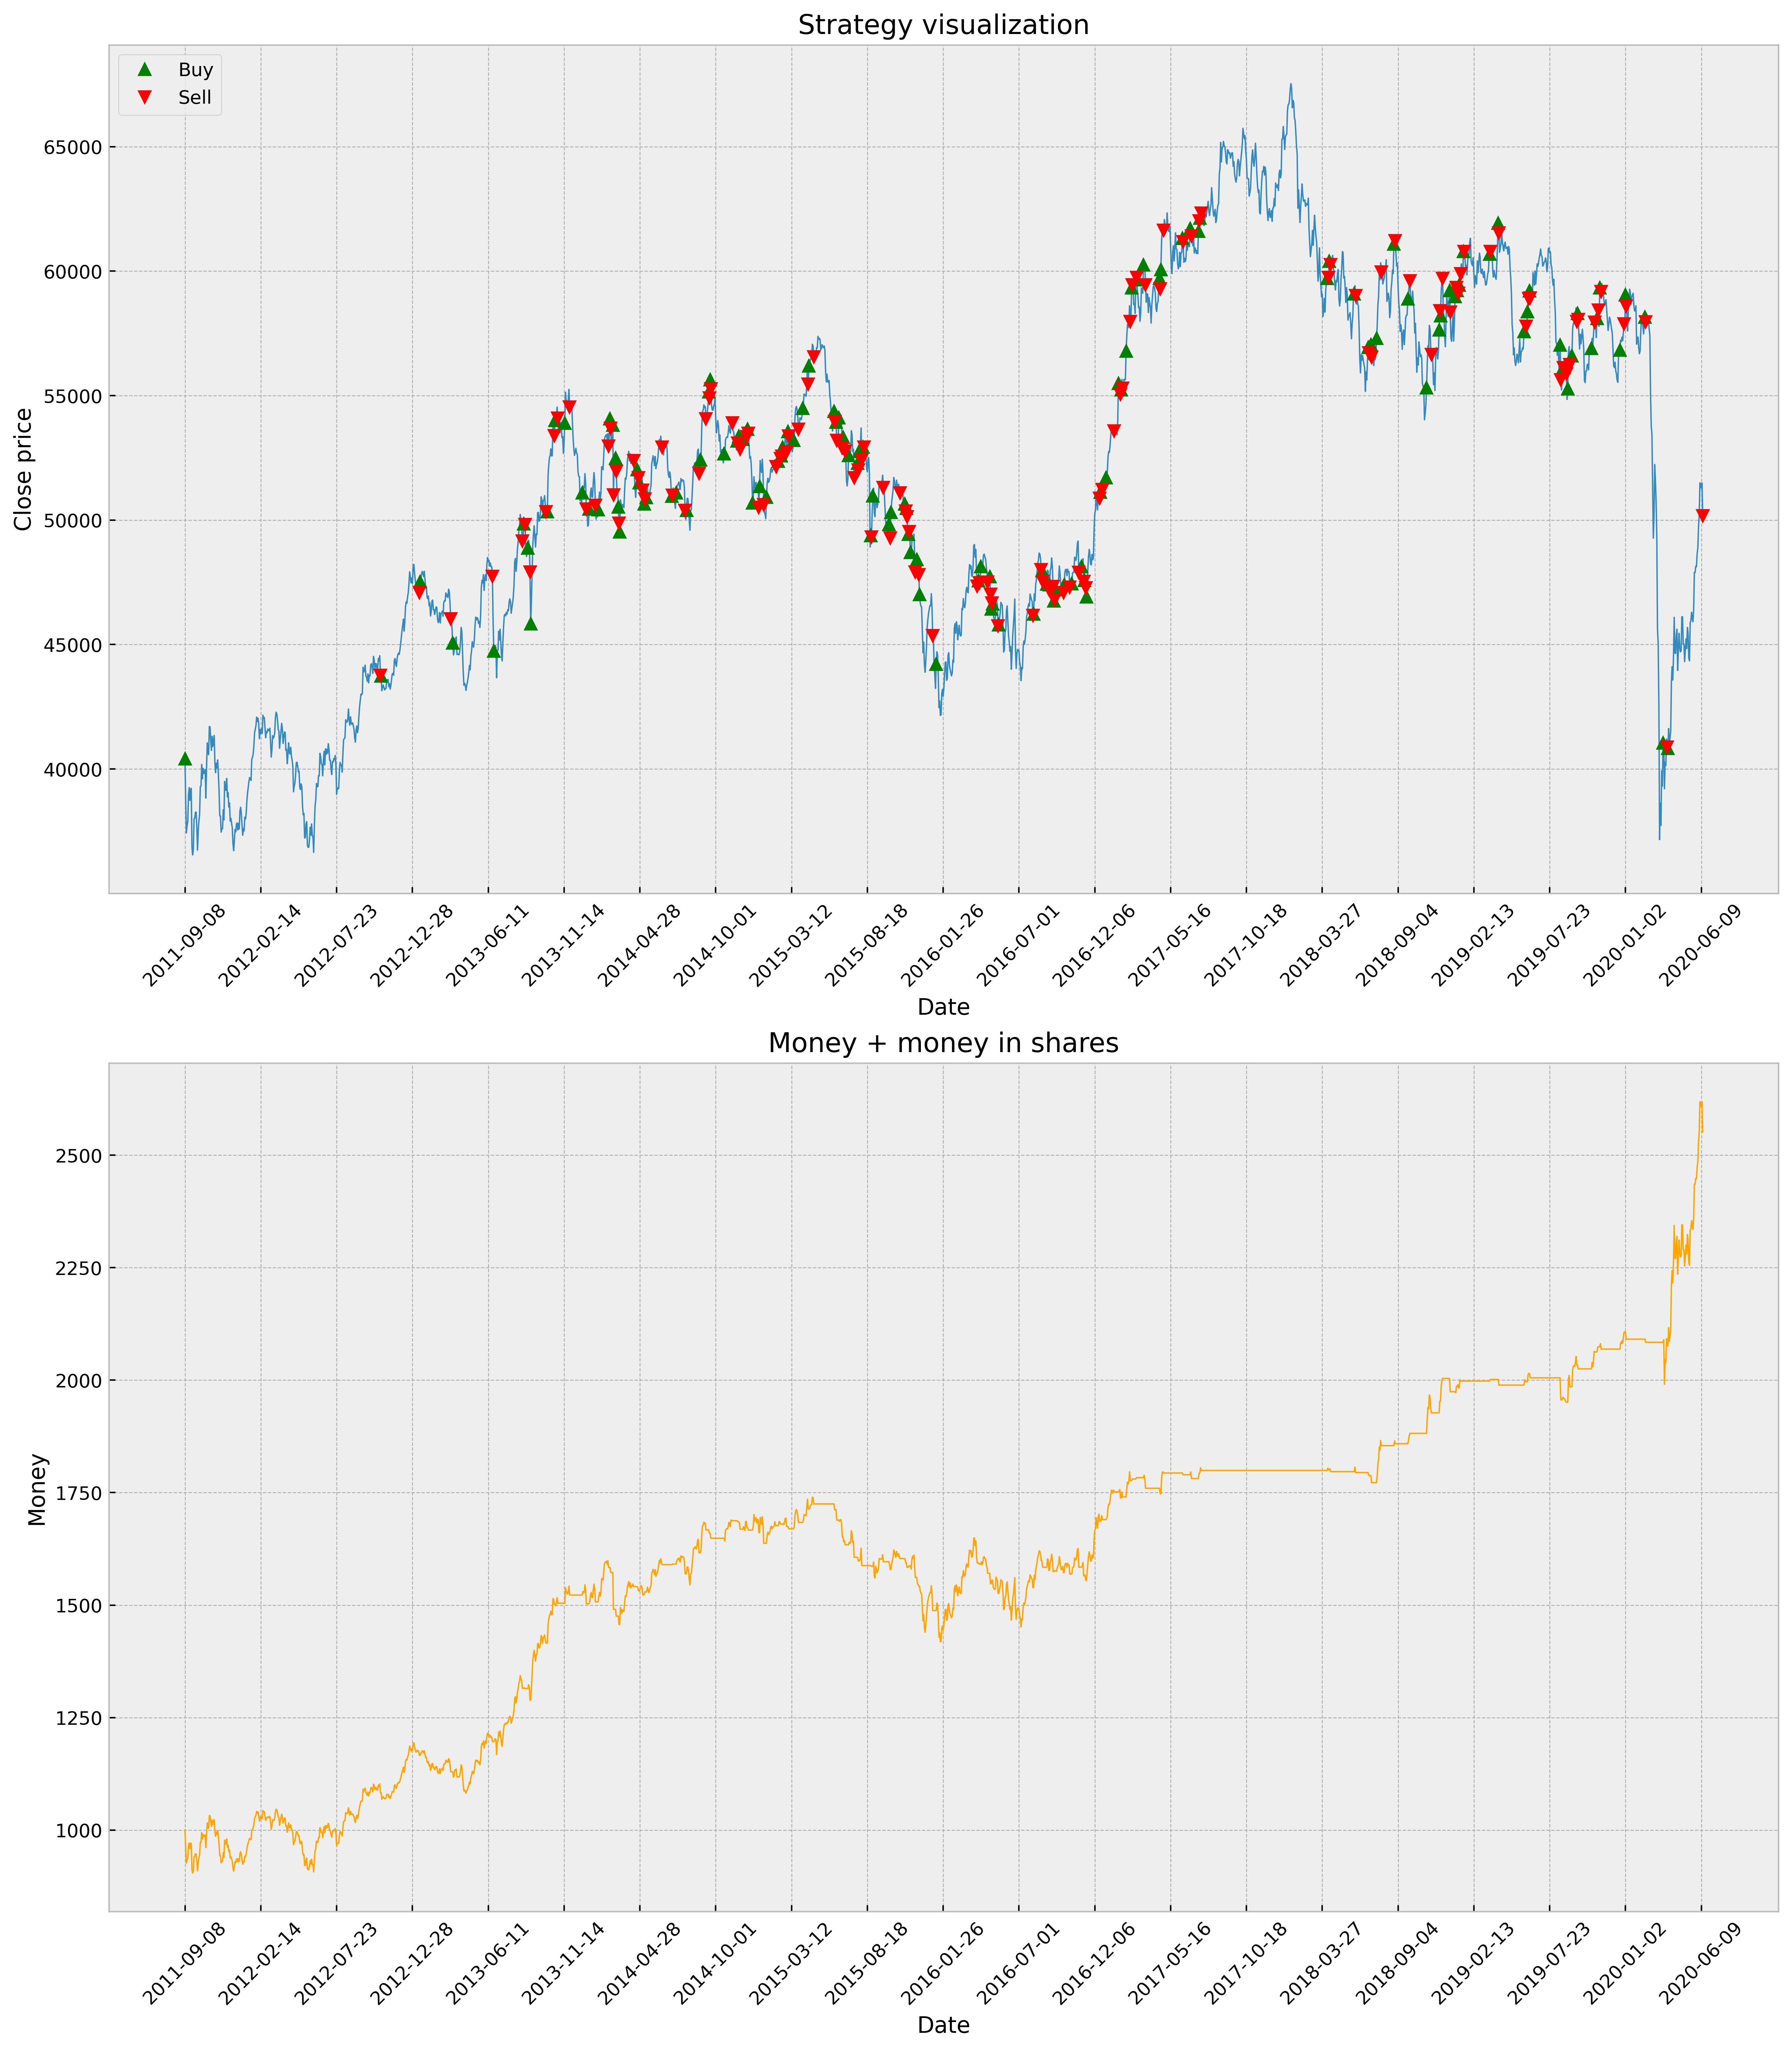

In [10]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(stock_data, ta_features, best_strategy)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)
best_strategy_final_money = sum_money_and_money_in_shares[-1]

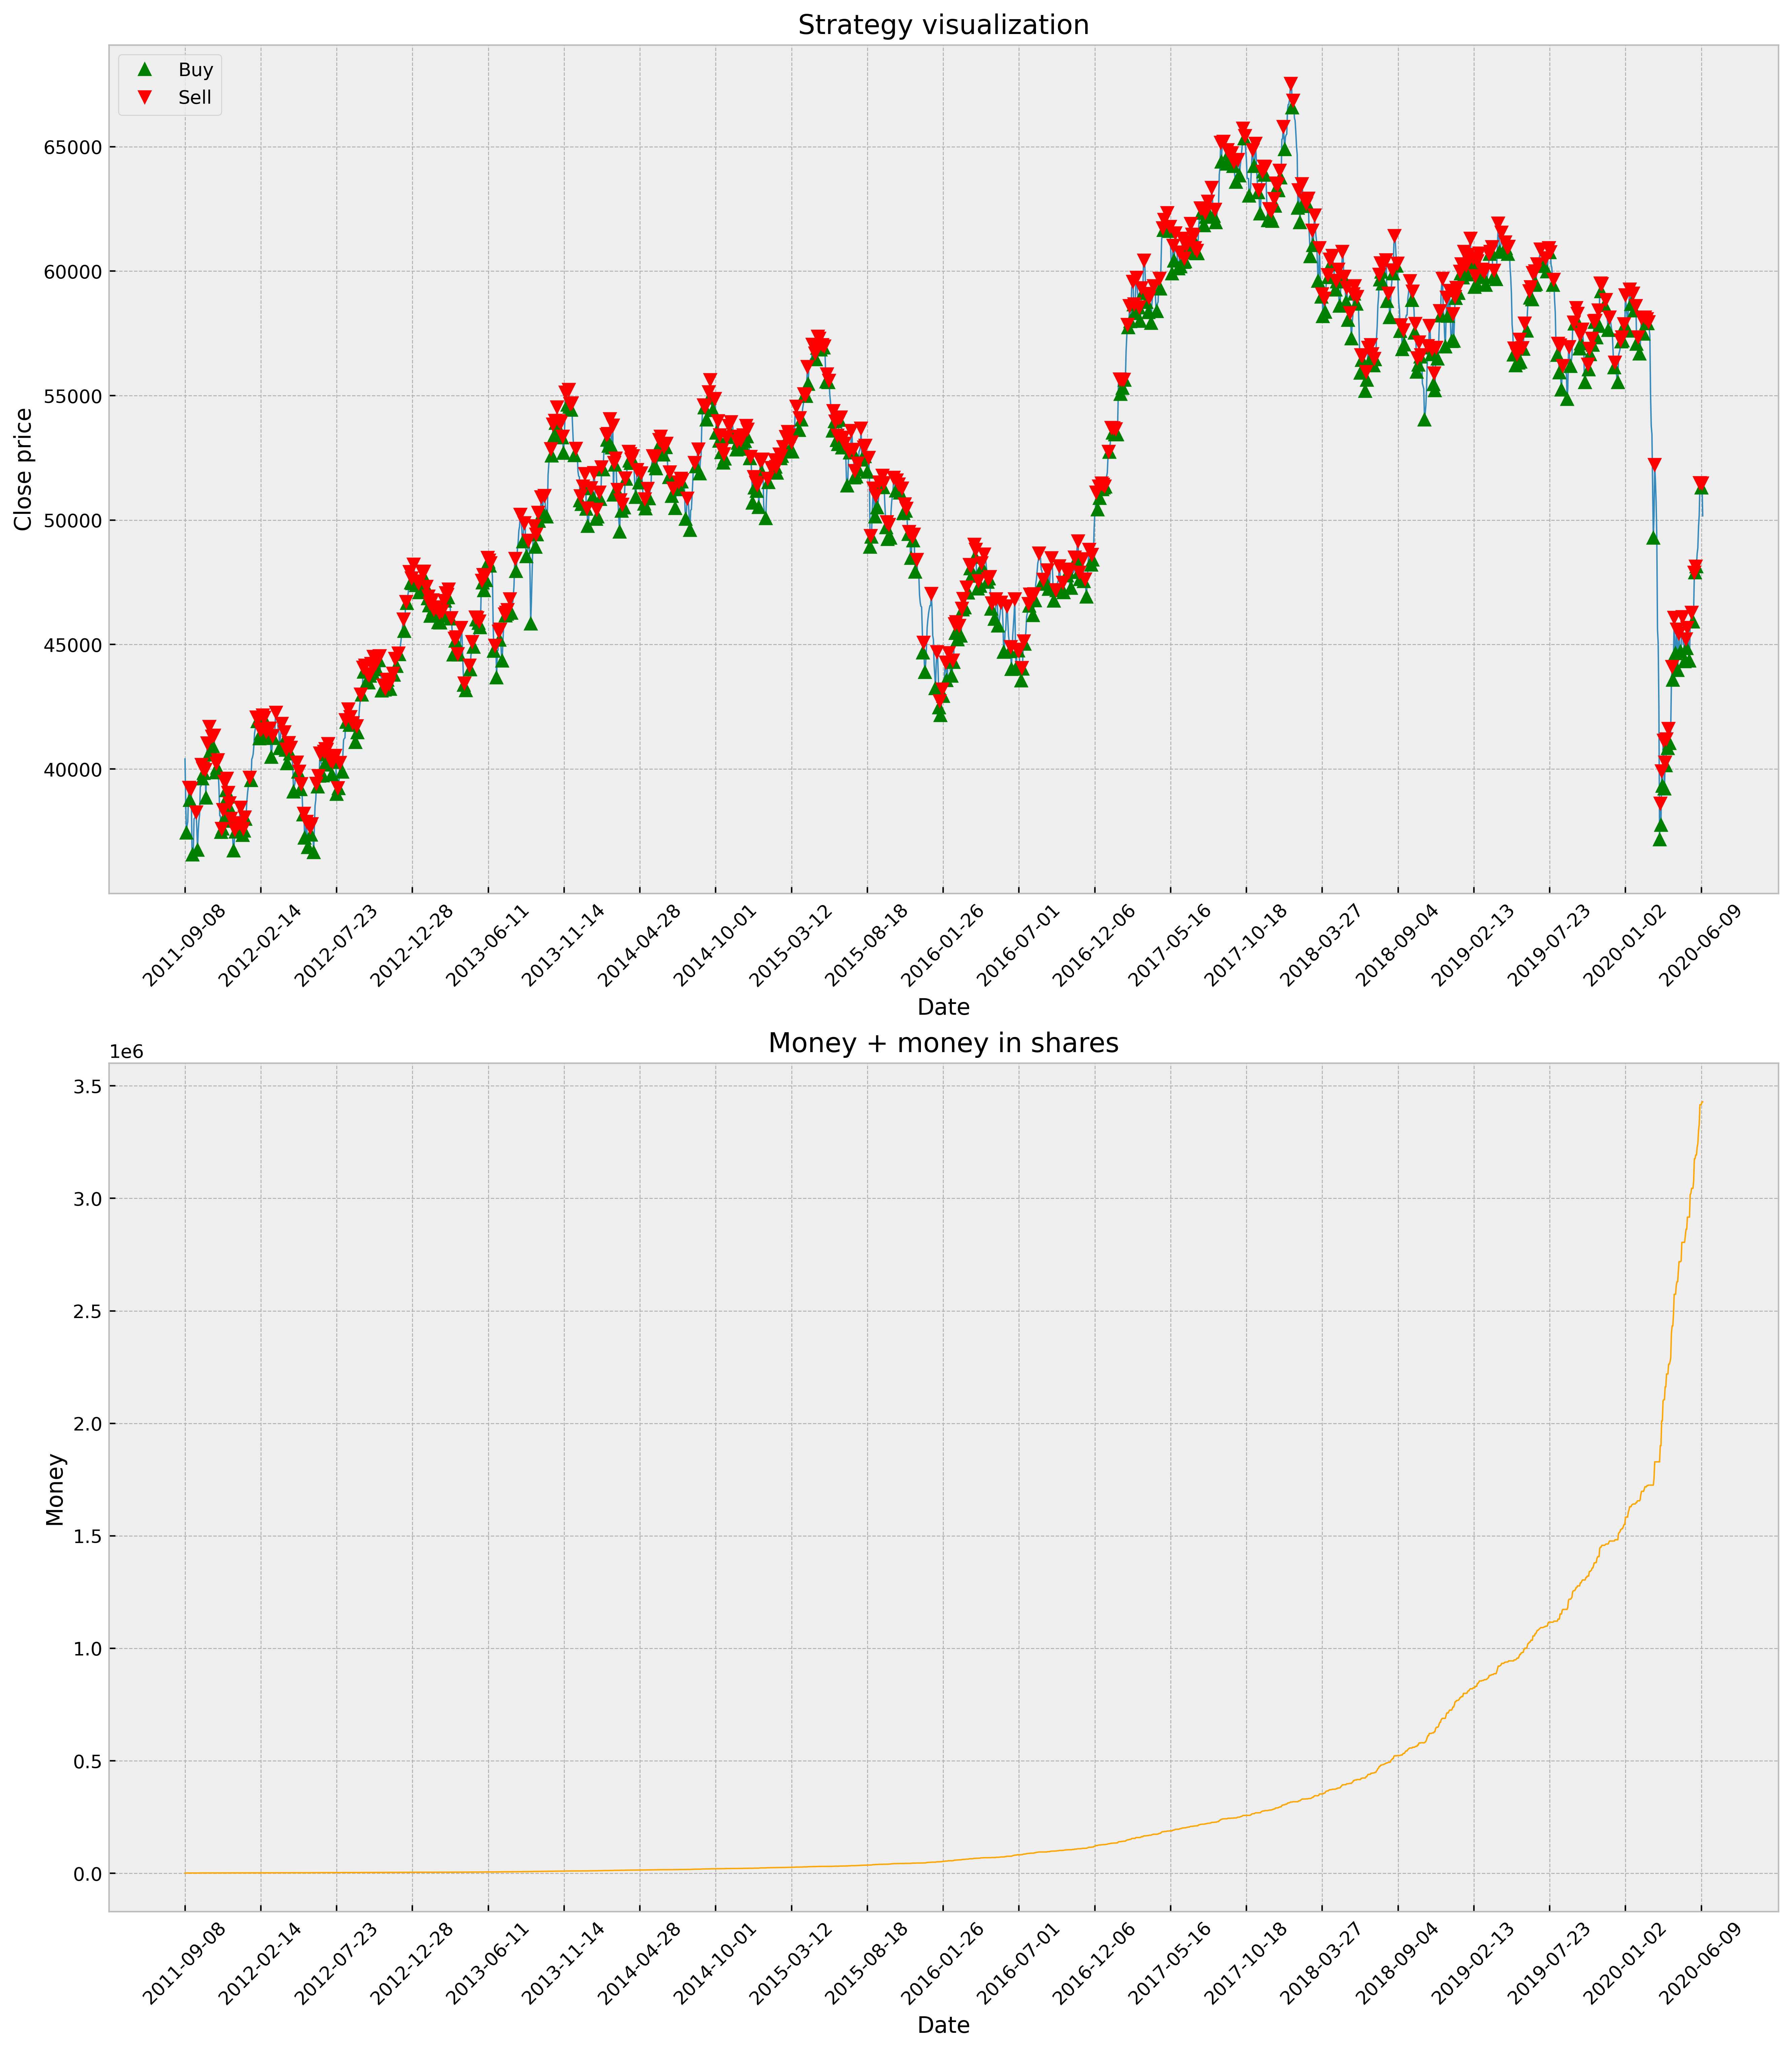

In [11]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_best_possible_strategy(stock_data)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)
best_possible_strategy_final_money = sum_money_and_money_in_shares[-1]

In [12]:
print(f'{best_strategy_final_money / best_possible_strategy_final_money * 100}%')

0.07439265410012187%
